<a href="https://colab.research.google.com/github/Chandramani05/Does-Money-buy-Baseball-games-/blob/main/MSML_603_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Packages

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Part 1: Wrangling

##Problem 1


##Extracting Data from the database

In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/lahman2014.sqlite'
connect = sqlite3.connect(file)
print(file)
total_salary_query =  'SELECT * FROM Salaries'
total_team_query = 'SELECT * FROM teams'
team_table = pd.read_sql(total_team_query, connect)
salary_table = pd.read_sql(total_salary_query, connect)

/content/drive/MyDrive/Colab Notebooks/lahman2014.sqlite


###Team Table

In [4]:
team_table

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NA,FW1,KEK,None,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NA,NY2,NNA,None,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2014,NL,PIT,PIT,C,2,162,81.0,88,74,...,148.0,0.983,Pittsburgh Pirates,PNC Park,2442564.0,98,97,PIT,PIT,PIT
2771,2014,NL,SDN,SDP,W,3,162,81.0,77,85,...,124.0,0.983,San Diego Padres,Petco Park,2195373.0,91,91,SDP,SDN,SDN
2772,2014,NL,SFN,SFG,W,2,162,81.0,88,74,...,155.0,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN
2773,2014,NL,SLN,STL,C,1,162,81.0,90,72,...,145.0,0.985,St. Louis Cardinals,Busch Stadium III,3540649.0,101,100,STL,SLN,SLN


###Salary Table

In [5]:
salary_table

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000.0
1,1985,ATL,NL,bedrost01,550000.0
2,1985,ATL,NL,benedbr01,545000.0
3,1985,ATL,NL,campri01,633333.0
4,1985,ATL,NL,ceronri01,625000.0
...,...,...,...,...,...
24753,2014,WAS,NL,storedr01,3450000.0
24754,2014,WAS,NL,strasst01,3975000.0
24755,2014,WAS,NL,werthja01,20000000.0
24756,2014,WAS,NL,zimmejo02,7500000.0


###Calculating Winning percentage

In [6]:
win_rate_query = "SELECT teamID, yearID,sum(W) as total_wins, sum(W)+sum(L) as total_games, \
            100*CAST(sum(W) AS float)/(sum(W)+sum(L)) as 'win_rate%', franchID FROM teams \
            GROUP BY teamID,yearID ORDER BY teamID"

team_win_rate = pd.read_sql(win_rate_query, connect)
team_win_rate 

,teamID,yearID,total_wins,total_games,win_rate%,franchID
0,ALT,1884,6,25,24.000000,ALT
1,ANA,1997,84,162,51.851852,ANA
2,ANA,1998,85,162,52.469136,ANA
3,ANA,1999,70,162,43.209877,ANA
4,ANA,2000,82,162,50.617284,ANA
...,...,...,...,...,...,...
2770,WS8,1887,46,122,37.704918,WNL
2771,WS8,1888,48,134,35.820896,WNL
2772,WS8,1889,41,124,33.064516,WNL
2773,WS9,1891,44,135,32.592593,WAS


###Forming Relation between salary table and above team win rate table

I will inner join both the table to get rid of the missing data

In [7]:
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID ORDER BY teamID"

team_salary = pd.read_sql(salary_query, connect)

data = team_salary.merge(team_win_rate, how = 'inner', left_on=["teamID", "yearID"], right_on = ["teamID", "yearID"])
data

,teamID,yearID,total_payroll,total_wins,total_games,win_rate%,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
...,...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593,WSN
854,WAS,2011,63856928.0,80,161,49.689441,WSN
855,WAS,2012,80855143.0,98,162,60.493827,WSN
856,WAS,2013,113703270.0,86,162,53.086420,WSN


#Part 2: Exploratory Data Analysis


###Problem 2 : Illustrating the payroll distribution across teams on time 1990-2004

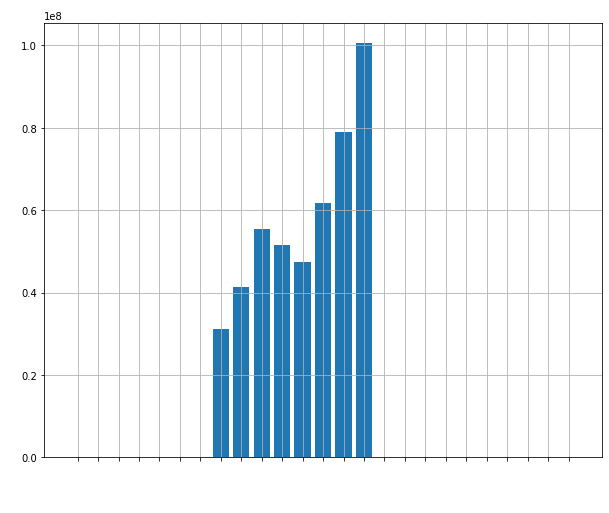

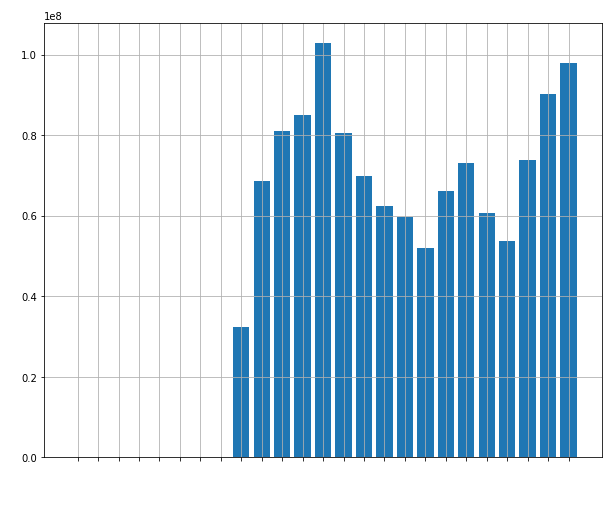

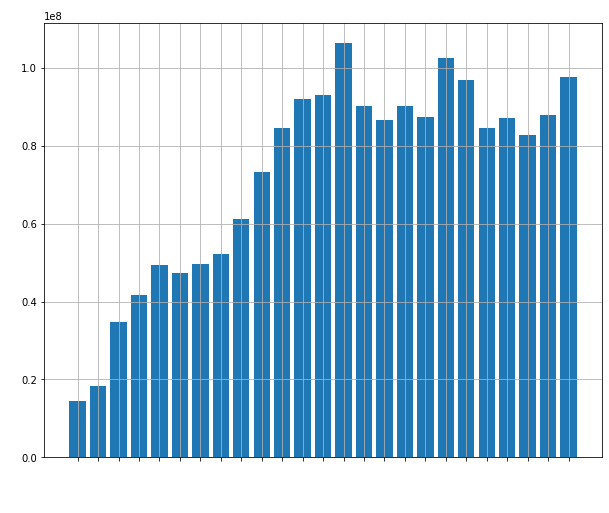

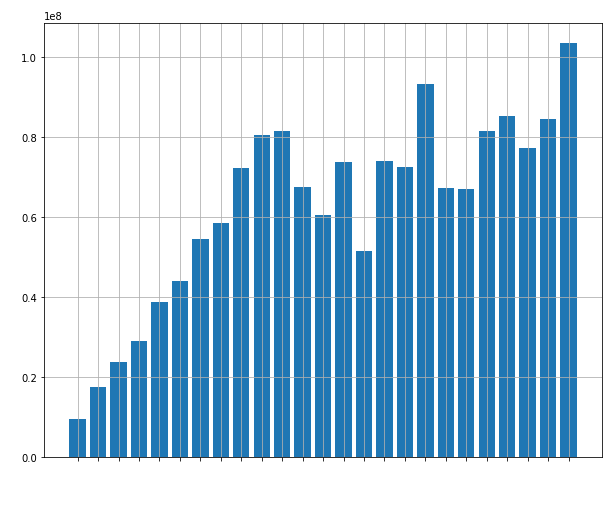

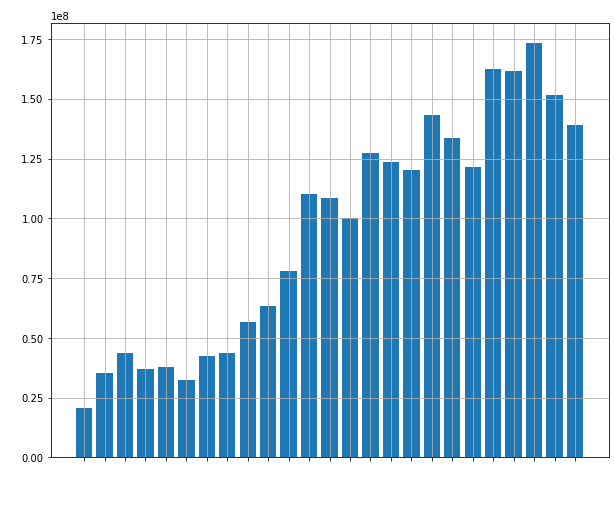

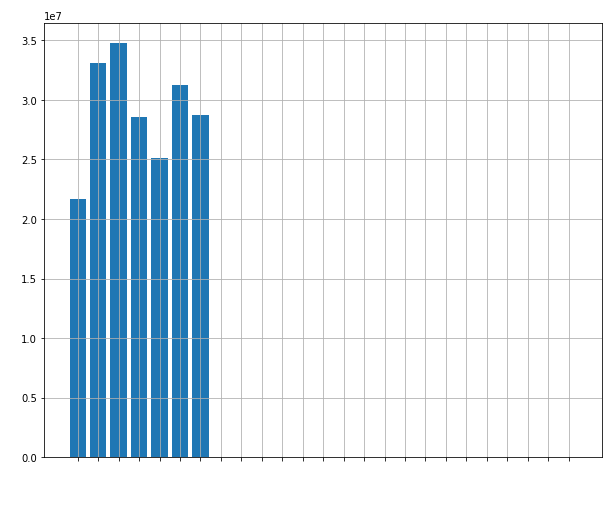

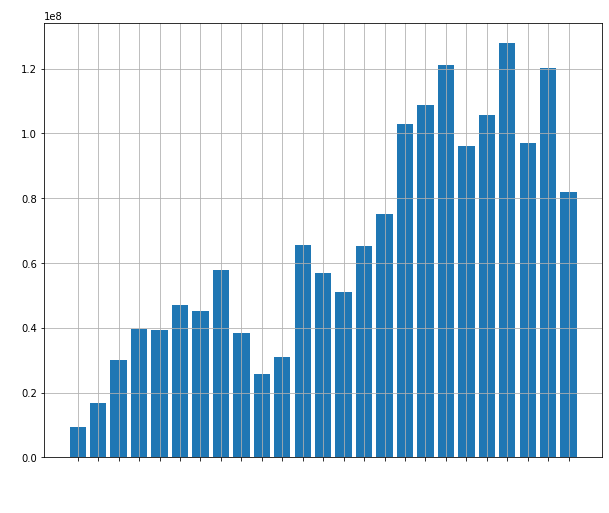

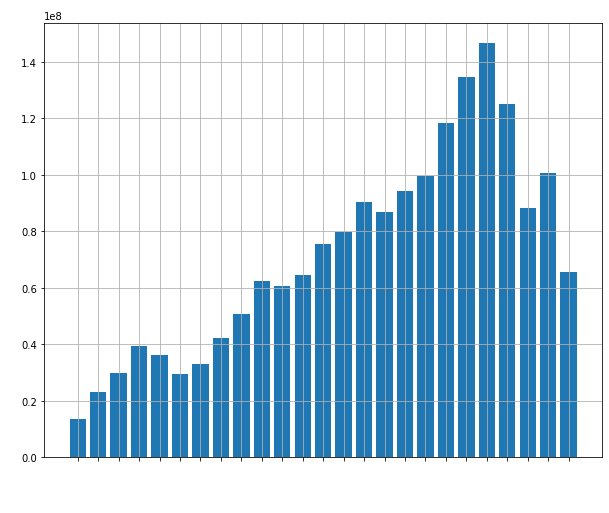

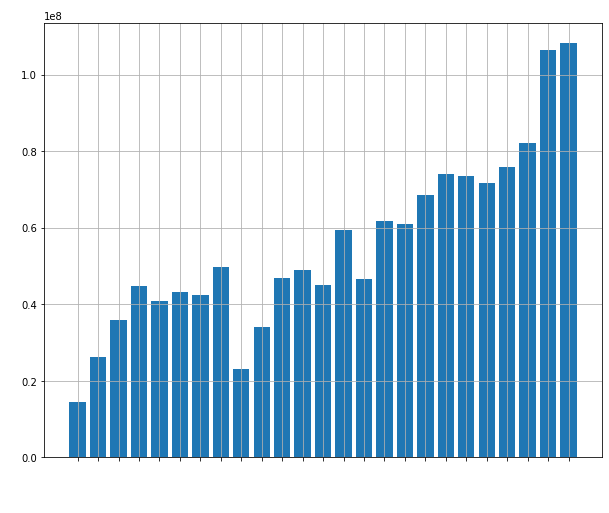

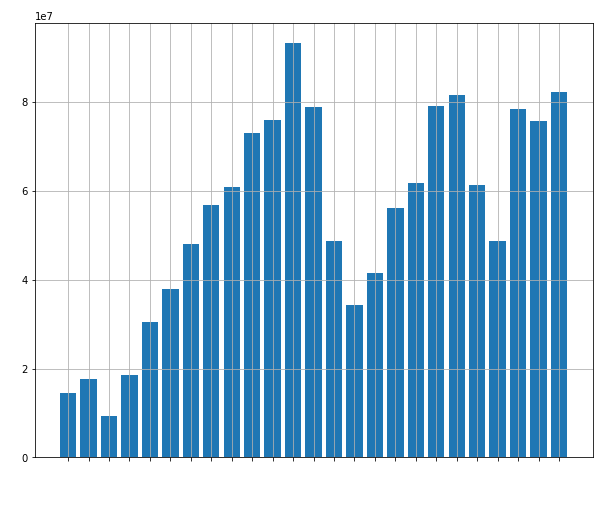

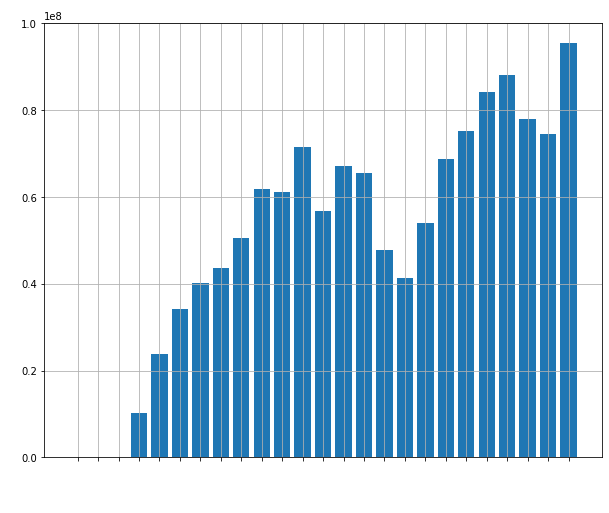

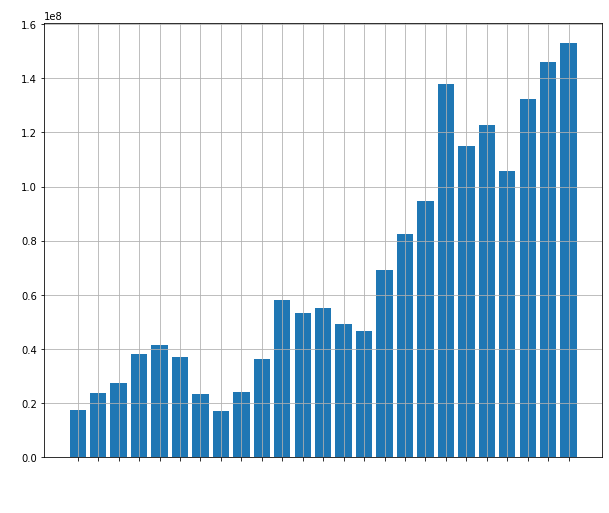

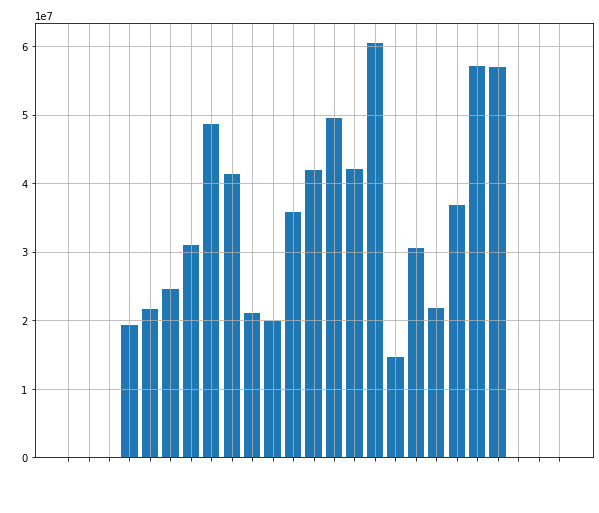

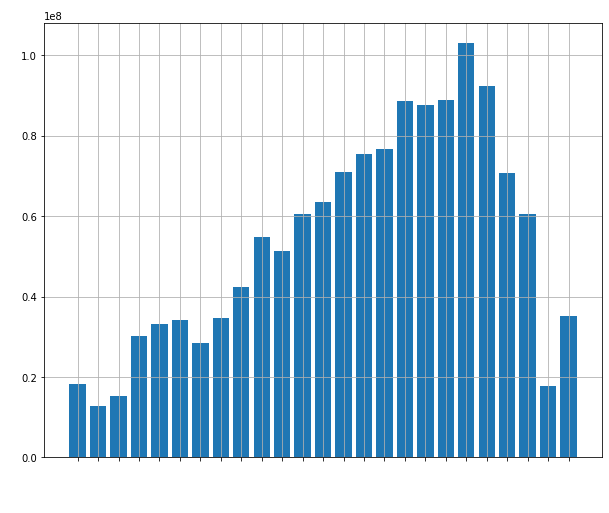

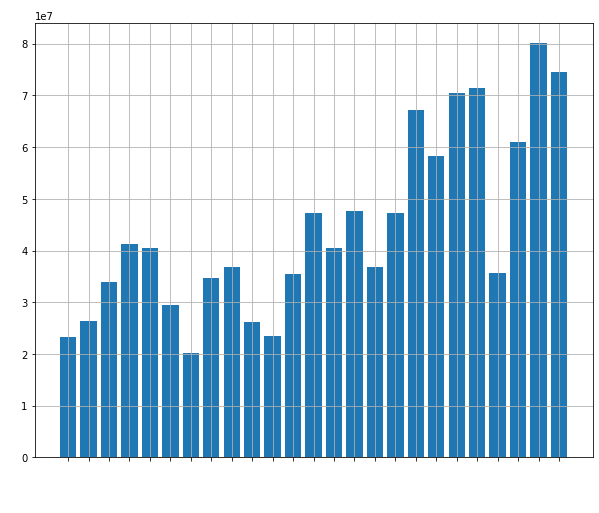

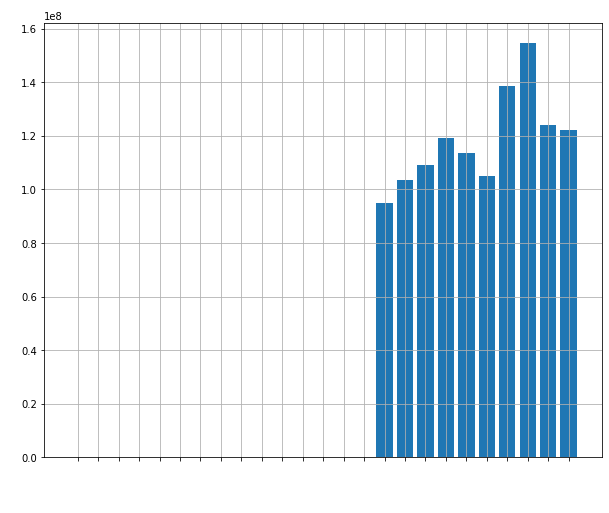

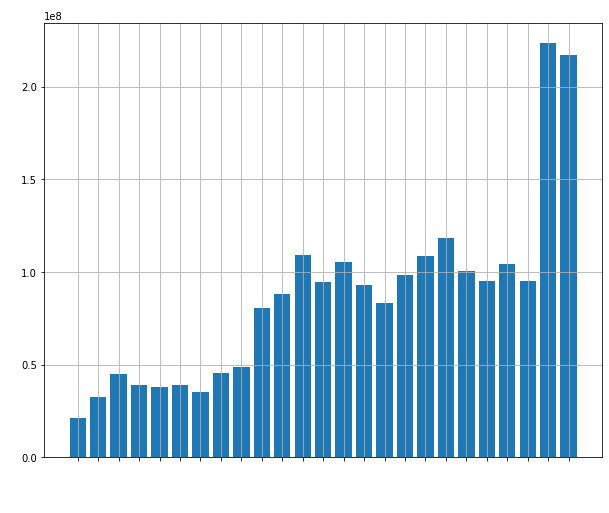

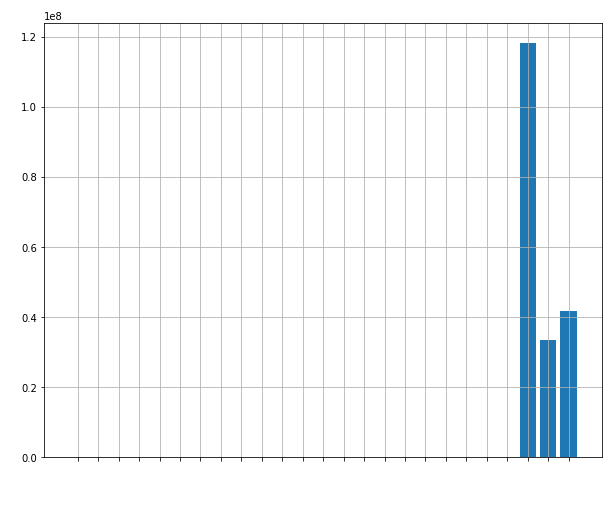

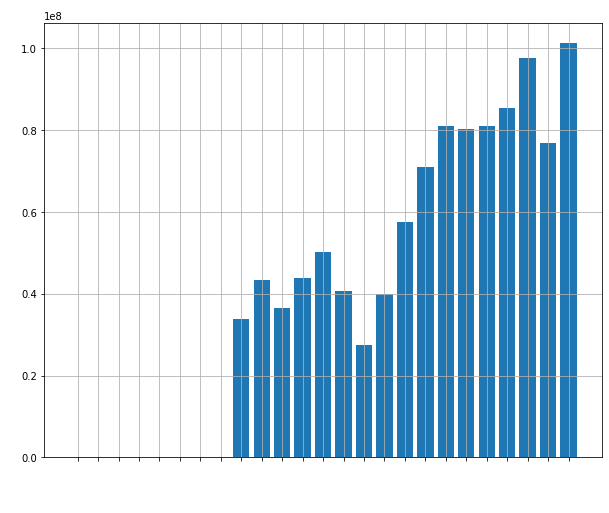

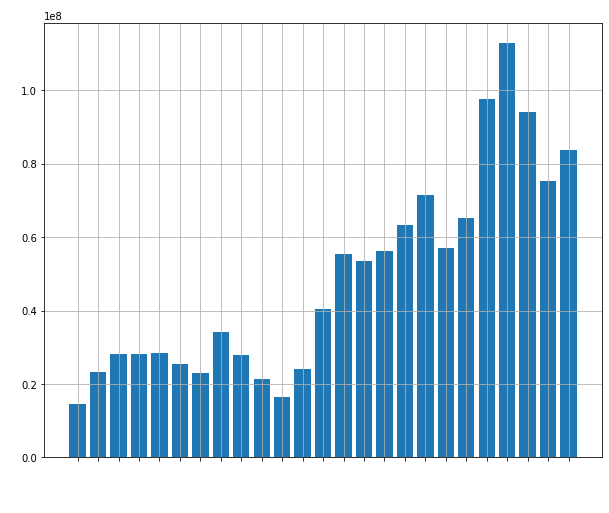

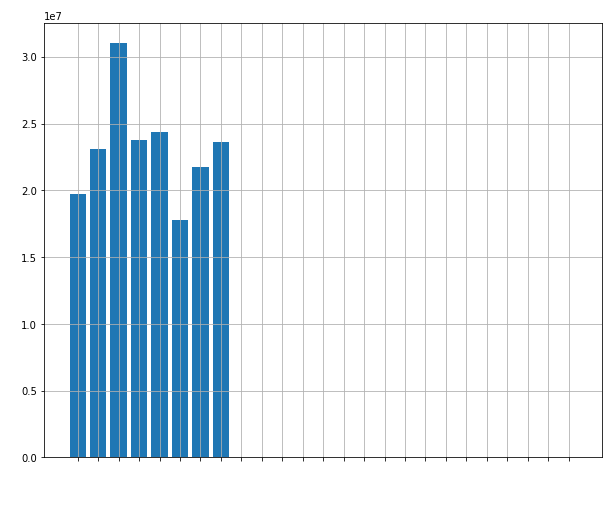

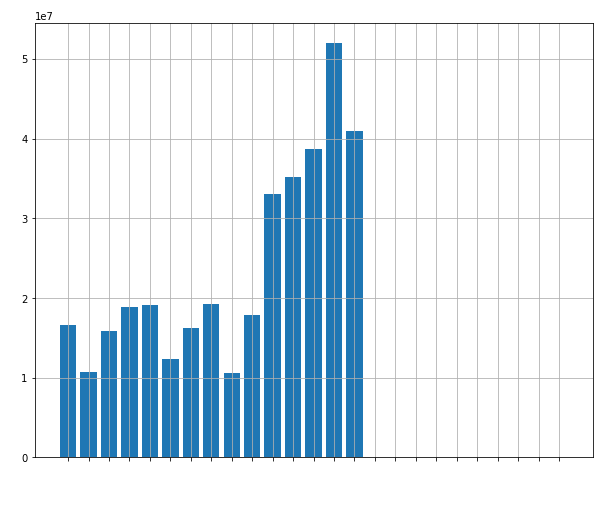

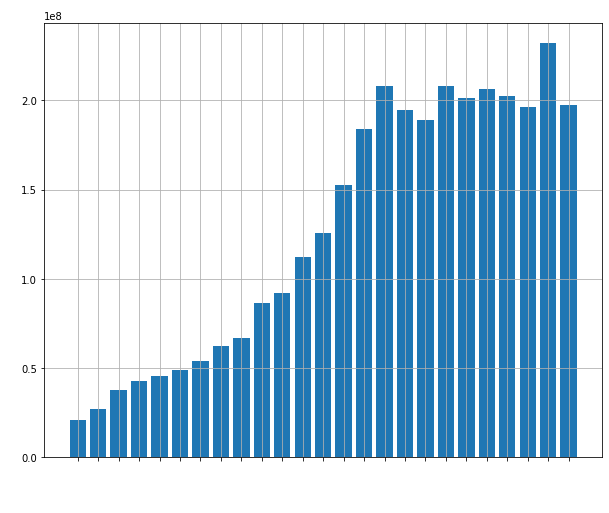

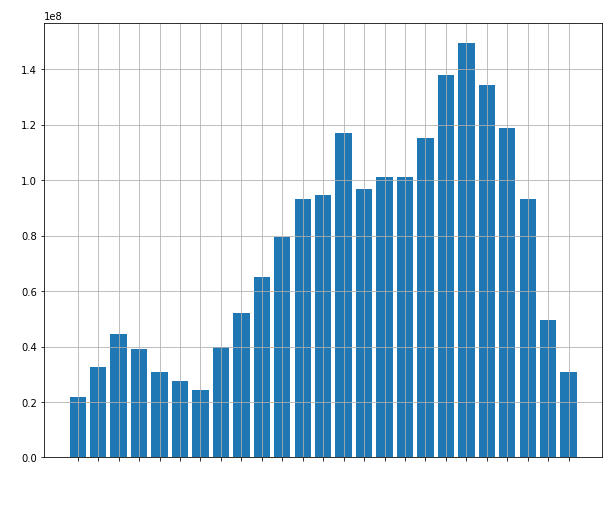

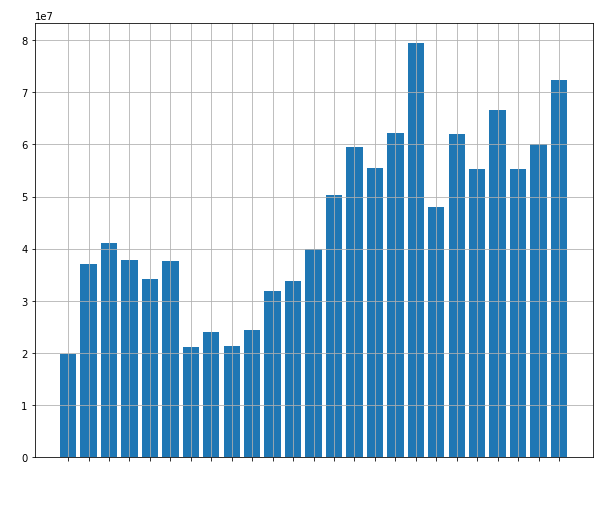

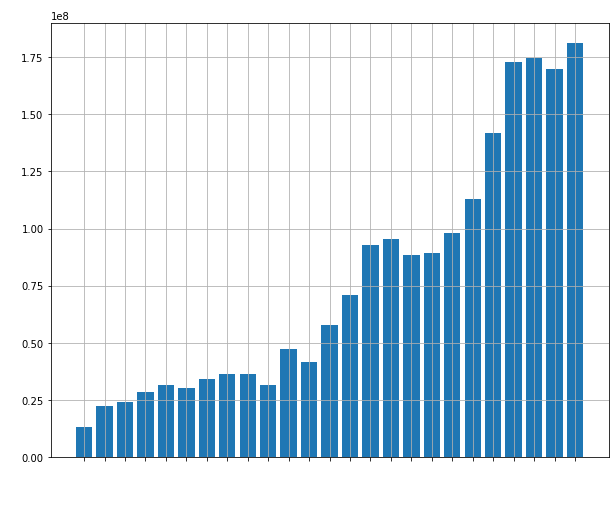

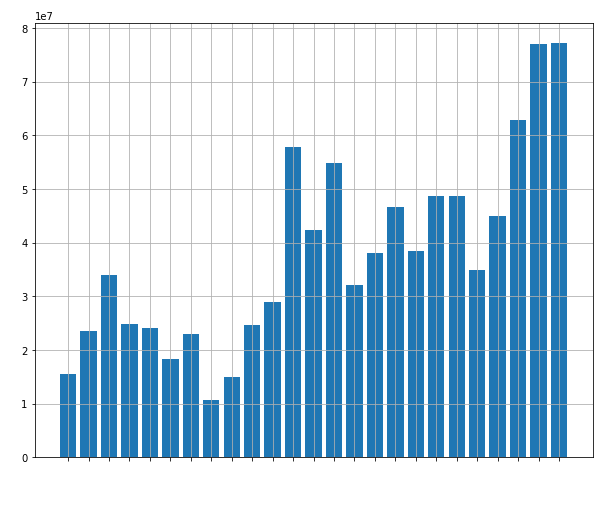

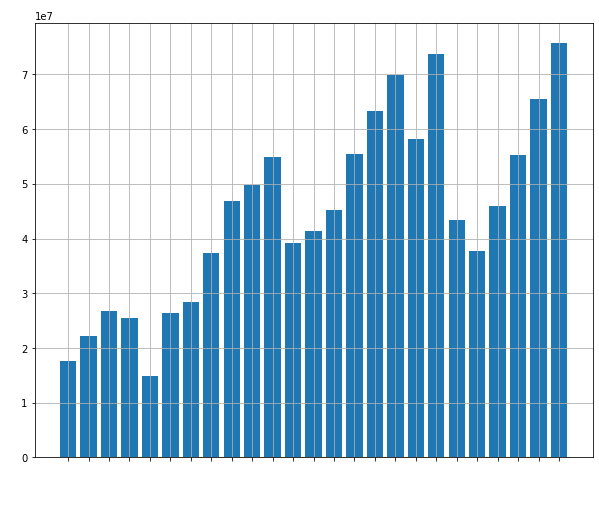

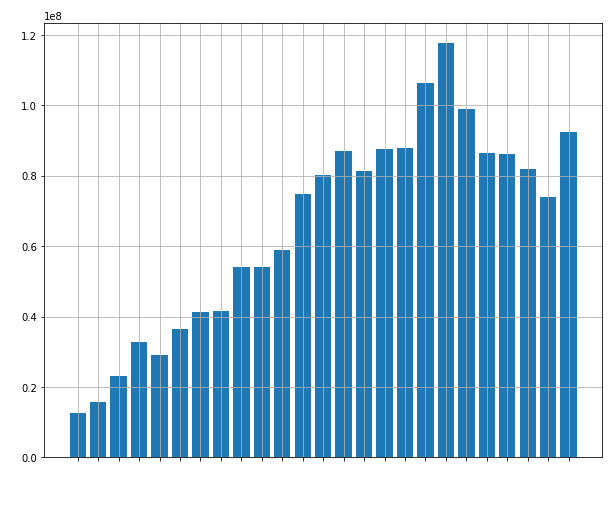

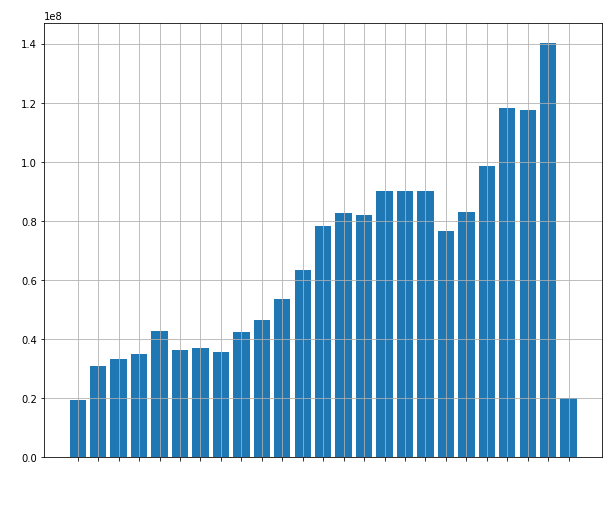

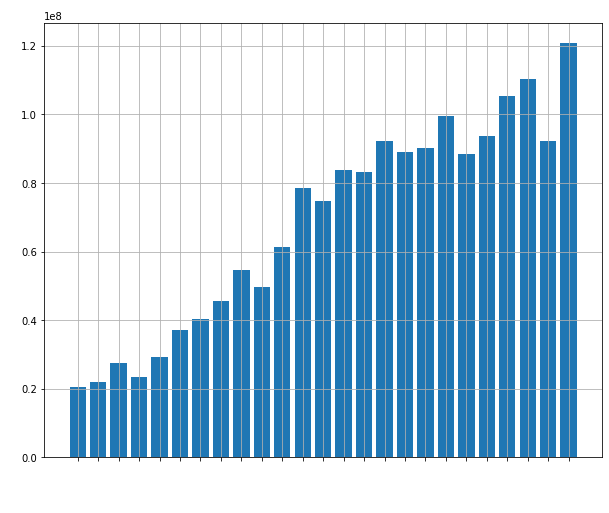

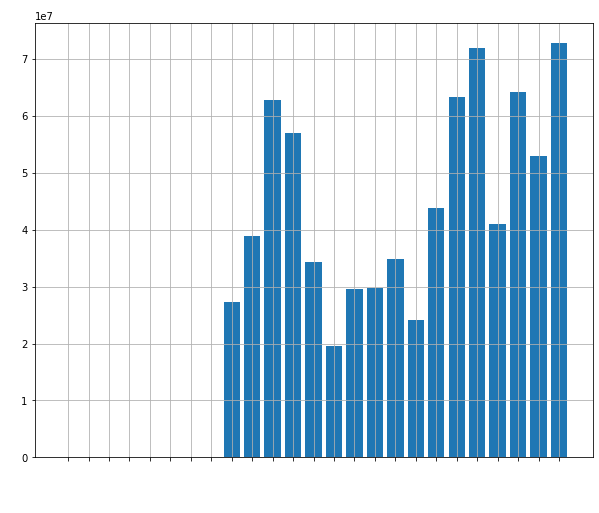

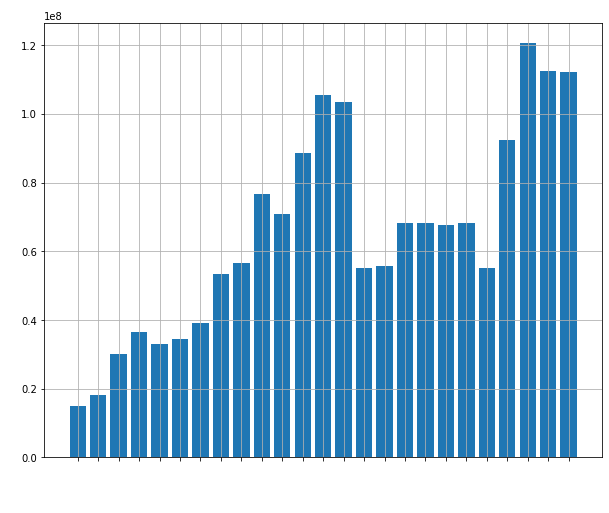

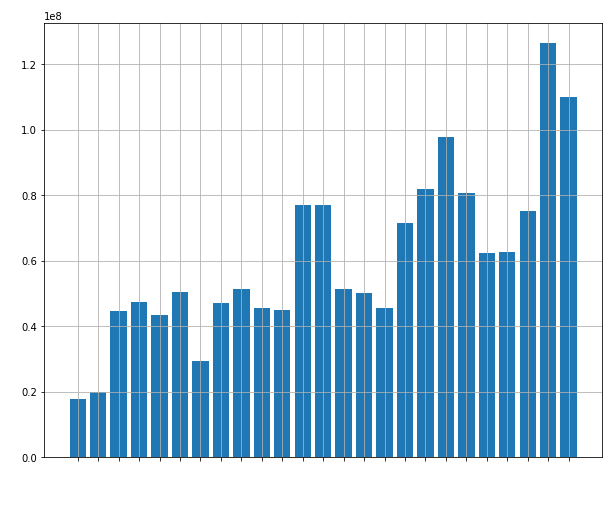

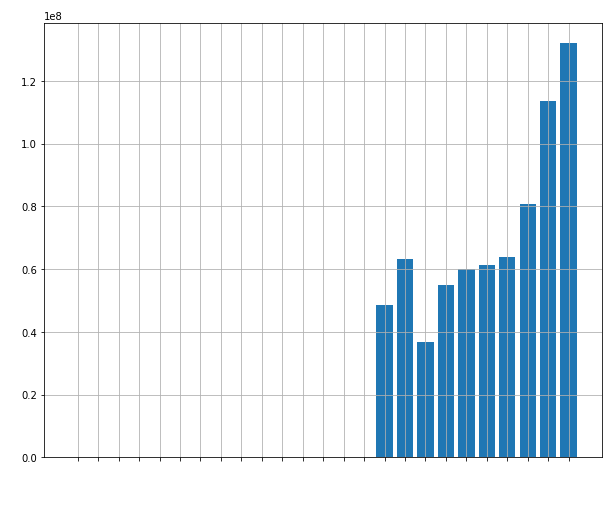

In [8]:
#Getting all the teams
team_list = data.teamID.unique()

#Total = 35, Hence plotting 35 graphs each for one team from 1990-2014
#x = years
#y = payrolls

for team in team_list :
  team_df = pd.DataFrame({'yearID' : range(1990,2015)})
  salary_data = data[['yearID','teamID','total_payroll']]
  team_group =  salary_data.groupby(['teamID']).get_group(team)
  merge_data = team_df.merge(team_group, how = 'left', left_on = ['yearID'], right_on= ['yearID'])
  plt.figure(figsize= (10,8))
  plt.bar(merge_data['yearID'],merge_data['total_payroll'].fillna(value=0))
  plt.xlabel("Years", color = 'w')
  plt.ylabel("Payroll", color = 'w')
  plt.xticks(merge_data['yearID'], color ='w', rotation = 65)
  
  plt.title(team, color = 'w')
  plt.grid()
  plt.show()


##Question 1
As per payroll distribution above it seems that total payroll increases over each year for each team if we ignore the non missing value

##Problem 3 : Plotting mean payroll of each tem through out the year

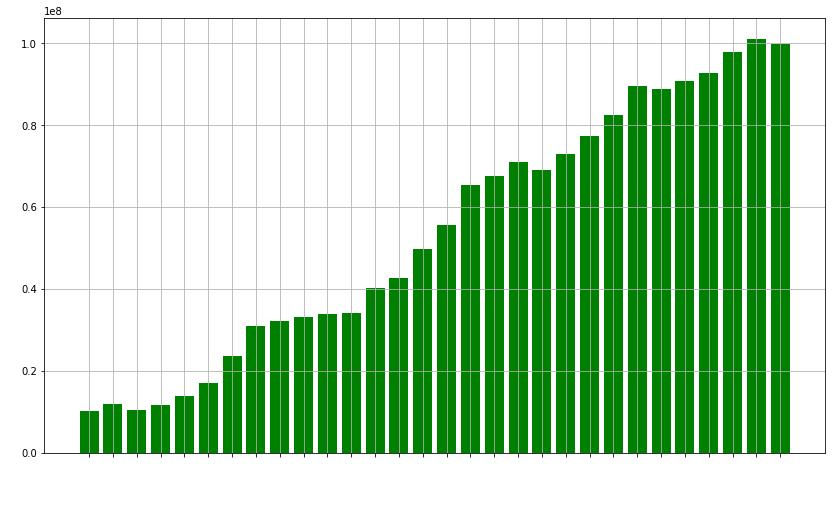

In [9]:
mean_payroll = (data[['yearID', 'total_payroll']].groupby('yearID')).mean()
plt.figure(figsize= (14,8))
plt.bar(mean_payroll.index, mean_payroll['total_payroll'], color = 'g')
plt.xlabel('Year', color = 'w')
plt.xticks(mean_payroll.index, color ='w', rotation = 45)

plt.ylabel("Mean Payroll over the years", color = 'w')
plt.grid()
plt.show()

#10075565.23076923
#101150854.93333334


**As seen from above plot that mean payroll is increasing over time as suggestion in question 1


##Correlation between payroll and winning percentage

###Problem 4
Plotting mean winning percentage and mean payroll for five time periods

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


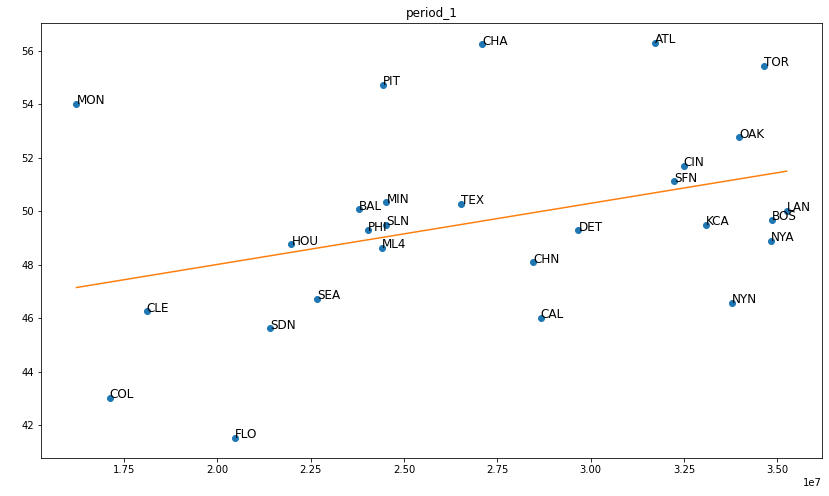

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


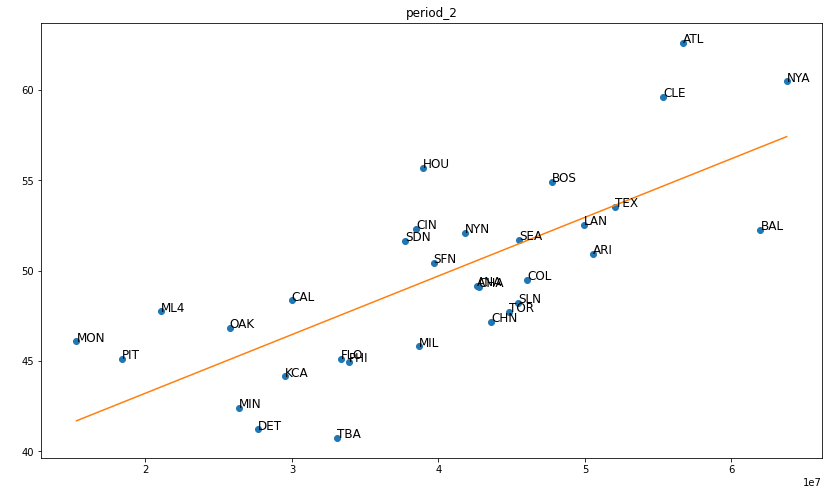

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


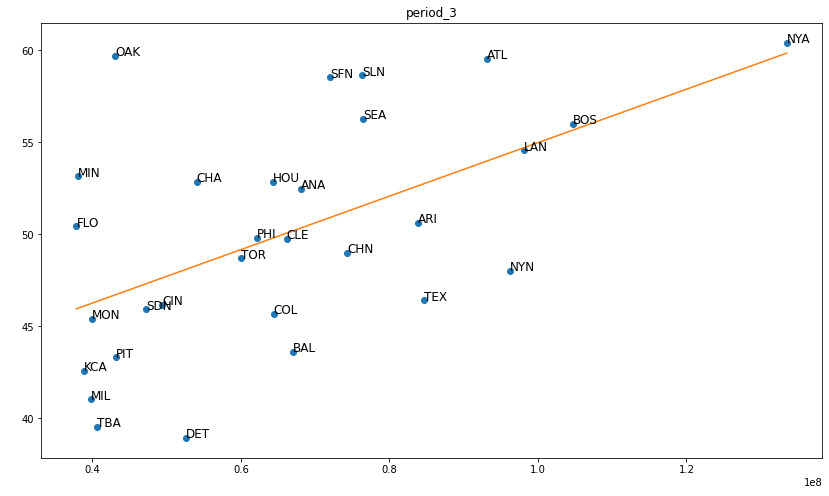

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


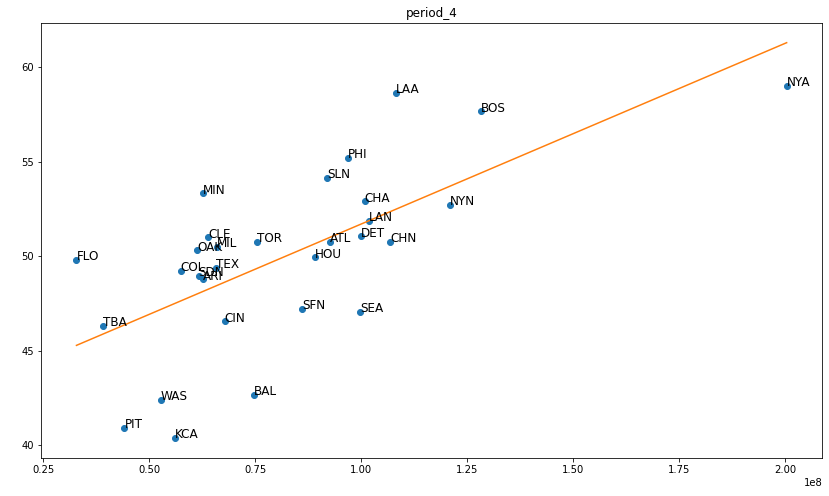

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


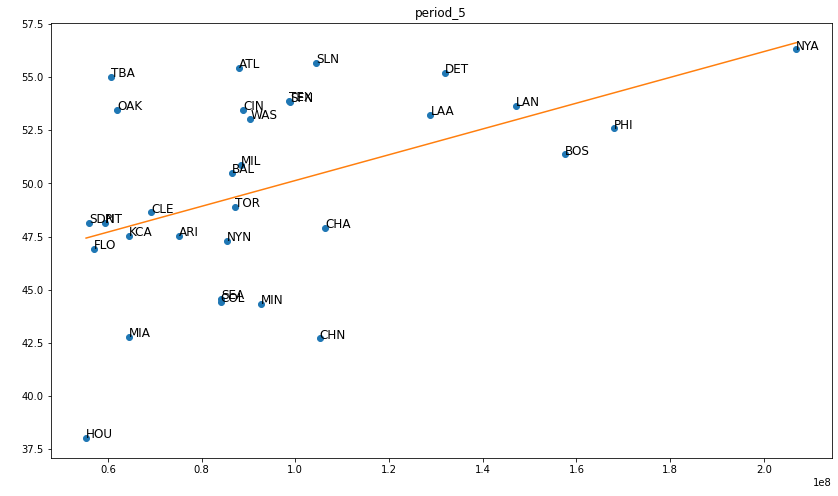

In [10]:
team_df = pd.DataFrame({'yearID' : range(1990, 2015)})
team_relation = data[['yearID', 'teamID', 'total_payroll','total_wins','total_games']]
table = team_df.merge(team_relation, how = 'left', left_on= ['yearID'], right_on= ['yearID'])

periods = [1990, 1995, 2000, 2005, 2010, 2015 ]
period_name = ['period_1','period_2','period_3','period_4','period_5']
table['categories'] = pd.cut(table['yearID'], periods, right = False, labels = period_name)


for period in period_name:
    win_rate_table=table.groupby(['categories']).get_group(period)\
                                    .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).sum().reset_index()
    win_rate_table['period_win_rate%'] = 100*win_rate_table['total_wins'] / win_rate_table['total_games']
    win_rate_table=win_rate_table.drop('total_wins',1).drop('total_games',1)

    mean_payroll_table=table.groupby(['categories']).get_group(period)\
                                    .drop('total_wins',1).drop('yearID',1).drop('total_games',1).groupby(['teamID']).mean().reset_index()
    mean_payroll_table.columns=['teamID', 'period_mean_payroll']
        
    final_table=mean_payroll_table.merge(win_rate_table)
    
    x_data=final_table['period_mean_payroll'].values
    y_data=final_table['period_win_rate%'].values
    z=np.polyfit(x=x_data,y=y_data,deg=1)
    f=np.poly1d(z)
    x_new = np.linspace(x_data.min(), x_data.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(14,8))
    plt.plot(x_data, y_data,'o',x_new,y_new)
    
    ## annotate each point with its team name.
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    
    plt.xlabel("Mean Payroll", color = 'w')
    plt.ylabel("Min Win Rate %", color = 'w')
    plt.title(period)
    plt.show()

##Question 2
Sol : 
Following points can be noted from the above graphs:
1. The team payroll is increasing across these periods.
2. As per interpolation line, basically, if payroll is larger, win rate is higher.
3. The team above interpolation line seems to have higher efficiency i.e strategically they are paying more to gain a higher win rate.
4. The team NYA except period 1 (1990-1995 is always at upper-right which means that this team beleive in the above strategy that paying more guarantees more win rate.
5. On the other hand OAK is always locate at the left half of the graph except period 1990-1995 which means it spents less money but it always high win rate as it is located above the interpolation line. In period 3 we can see that OAK's payroll is least but win rate is one of the highest,which means OAK's effeciency in this time period is vary high.



#Part 3: Data transformations

##Problem 5 : Standardizing across years

In [33]:
mean_payroll = (data[['yearID','total_payroll']].groupby('yearID')).mean()
std = (data[['yearID','total_payroll']].groupby('yearID')).std()

mean_payroll.columns = ['mean_payroll']
std.columns = ['std']

##Copying the above table
new_data = table.drop('total_wins',1).copy()

##Reanaming the column 'total_games' to 'std_payroll'
new_data.rename(columns={'total_games': 'std_payroll'}, inplace=True)
new_data['std_payroll'] = new_data['std_payroll'].astype(float)

#Replacing the values of std_payroll

for index, row in new_data.iterrows() :
  value = (row['total_payroll'] - mean_payroll['mean_payroll'][row['yearID']]) / std['std'][row['yearID']]
  new_data.at[index, 'std_payroll'] = value

new_data = team_df.merge(new_data, how = "left", left_on = ['yearID'], right_on = ['yearID'])  
    


new_data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,yearID,teamID,total_payroll,std_payroll,categories
0,1990,ATL,14555501.0,-0.667275,period_1
1,1990,BAL,9680084.0,-1.959861,period_1
2,1990,BOS,20558333.0,0.924213,period_1
3,1990,CAL,21720000.0,1.232198,period_1
4,1990,CHA,9491500.0,-2.009859,period_1
...,...,...,...,...,...
723,2014,SLN,120693000.0,0.457126,period_5
724,2014,TBA,72689100.0,-0.593171,period_5
725,2014,TEX,112255059.0,0.272509,period_5
726,2014,TOR,109920100.0,0.221422,period_5


##Problem 6 : Creating new plots using the standarized payroll variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


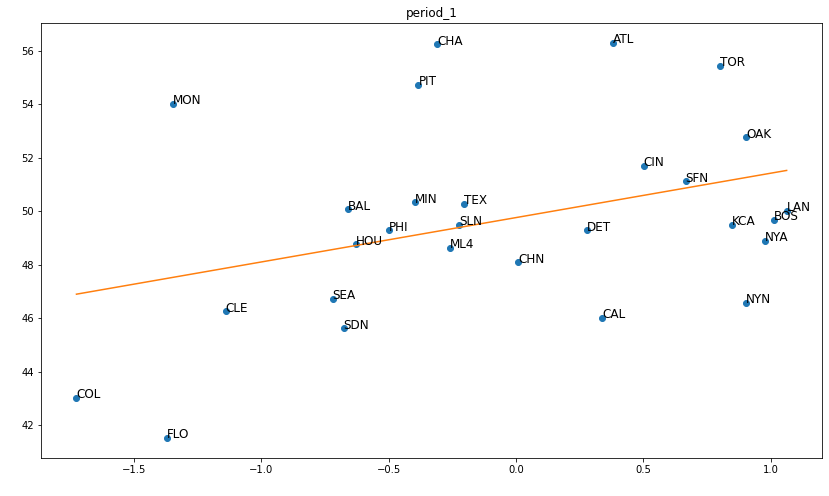

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


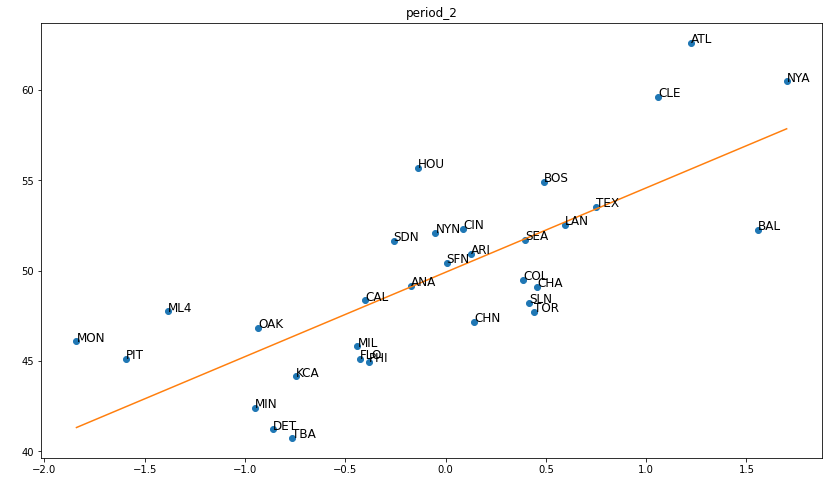

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


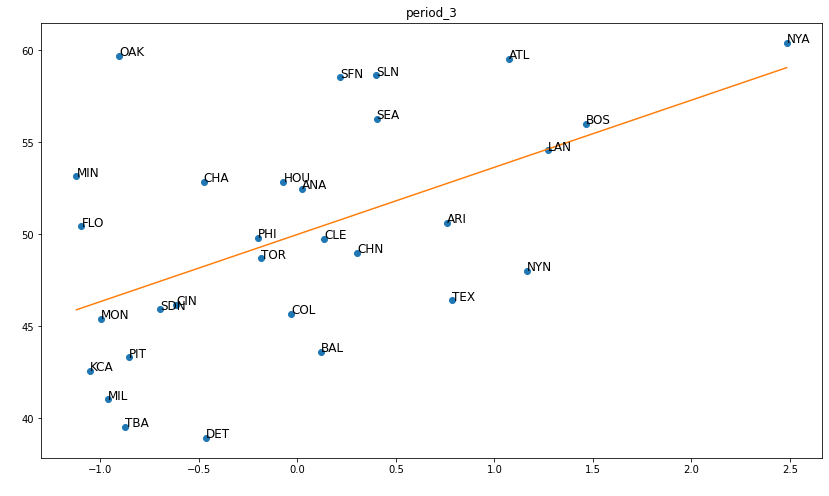

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


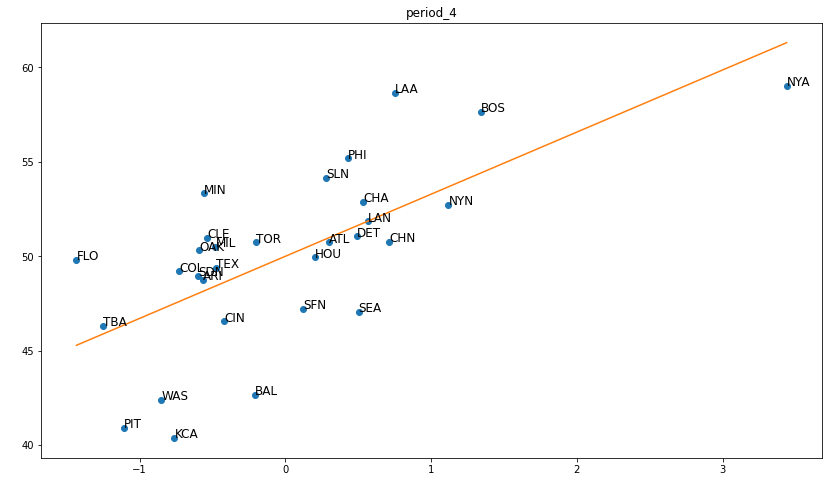

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


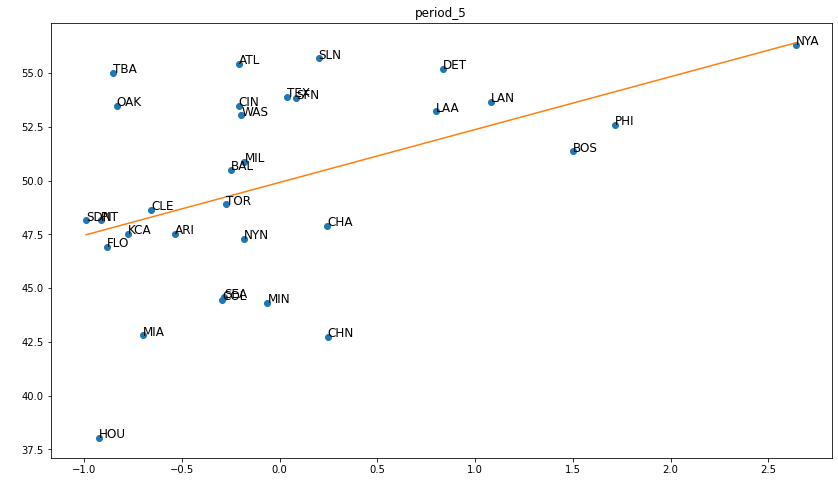

In [42]:

## Plot 5 graphs, each for one period. x-axis is the standardized payroll of this period (not exactly since we calculate
## the mean of standardized payroll of 5 years, and this is not the standardized payroll of this period. But it is very
## close to the standardized payroll. To get the exact standardized payroll of this period, we need to redo the problem 5
## again based on periods instead of years, and the variables got in problem 5 didn't do any contribution to get the 
## exact answer.) and y-axis is the win_rate of this period. Since there are totally 35 teams from 1990 to 2014, 
## there are up to 35 scatter points on each graph. Based on these points, make a regression line for each graphs.
for period in period_name:
    std_payroll_table = new_data.groupby(['categories']).get_group(period)\
                                   .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).mean().reset_index()
    std_payroll_table.columns=['teamID','period_std_payroll']
    
    win_rate_table=table.groupby(['categories']).get_group(period)\
                                    .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).sum().reset_index()
    win_rate_table['period_win_rate%'] = 100*win_rate_table['total_wins'] / win_rate_table['total_games']
    win_rate_table=win_rate_table.drop('total_wins',1).drop('total_games',1)
        
    final_table = win_rate_table.merge(std_payroll_table)
    x_data=final_table['period_std_payroll'].values
    y_data=final_table['period_win_rate%'].values
    z=np.polyfit(x=x_data,y=y_data,deg=1)
    f=np.poly1d(z)
    x_new = np.linspace(x_data.min(), x_data.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(14,8))
    plt.plot(x_data, y_data,'o',x_new,y_new)
    
    ## annotate each point with its team name.
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12, color = 'Black')
    
    plt.xlabel("Period Mean Standard Payroll", color = 'w')
    plt.ylabel("Priod Mean Win rate percent", color = 'w')
    plt.title(period)
    plt.show()

##Question 3

1. As observed by the above graphs the shape of the plots in problem 4 and problem 6 seems to be similar. Only the unit and range of the x-coordinates changed.
2. By doing the standardization, we can see which data is near the mean point directly and we can know in what degree the data is awaay from the mean.


##Expected Wins

###Problem 7 : Making a single scatter plot of winning percenatge with respect to standarized payroll.

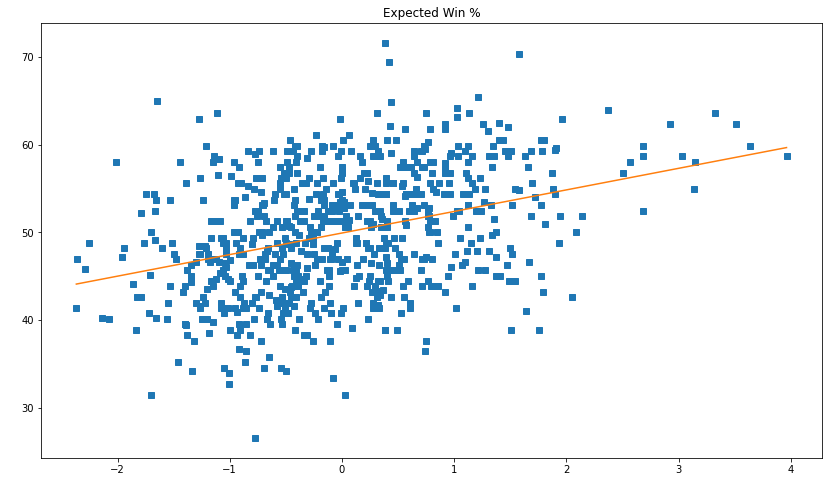

In [62]:
team_relation = data[['yearID', 'teamID', 'total_payroll','win_rate%']]
team_table  = team_df.merge(team_relation, how  = 'left', left_on = ['yearID'], right_on= ['yearID'])

win_table = team_table[['teamID','yearID','win_rate%']].copy()
win_table['std_payroll'] = new_data['std_payroll']


#Plotting the Regression Graph

x_data = win_table['std_payroll'].values
y_data = win_table['win_rate%'].values
z = np.polyfit(x = x_data, y = y_data, deg = 1)
fun = np.poly1d(z)


x_new = np.linspace(x_data.min(), x_data.max(), 100)
y_new = f(x_new)

plt.figure(figsize=(14, 8))
plt.plot(x_data,y_data,'s',x_new, y_new)

plt.xlabel("Standard Payroll", color = 'w')
plt.ylabel ("Win Rate %", color = 'w')
plt.title("Expected Win %")

plt.show()

###Caclulating the Expected Win %

In [63]:
win_table['expected_win %'] = win_table['std_payroll'] * 2.5 + 50
win_table

,teamID,yearID,win_rate%,std_payroll,expected_win %
0,ATL,1990,40.123457,-0.667275,48.331811
1,BAL,1990,47.204969,-1.959861,45.100348
2,BOS,1990,54.320988,0.924213,52.310533
3,CAL,1990,49.382716,1.232198,53.080495
4,CHA,1990,58.024691,-2.009859,44.975353
...,...,...,...,...,...
723,SLN,2014,55.555556,0.457126,51.142816
724,TBA,2014,47.530864,-0.593171,48.517072
725,TEX,2014,41.358025,0.272509,50.681273
726,TOR,2014,51.234568,0.221422,50.553554


##Spending efficiency

###Problem 8 

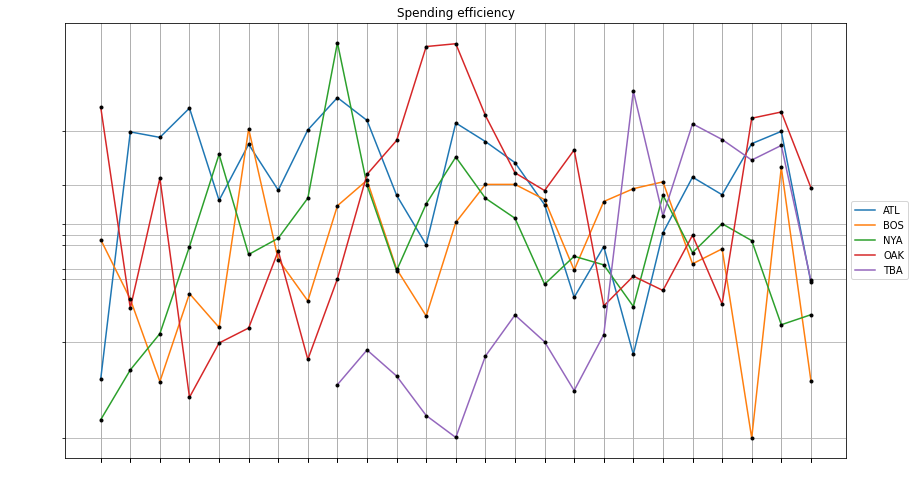

In [81]:
spending_table = team_table[['yearID', 'teamID', 'win_rate%']].copy()
spending_table['expected_win%'] = win_table['expected_win %']
spending_table['spending_efficiency'] = spending_table['win_rate%'] - spending_table['expected_win%']

##Taking the recommeded five teams
spending_eff_table = spending_table.loc[spending_table['teamID'].isin(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])].sort_values(['teamID', 'yearID'], ascending = True)
fig, ax = plt.subplots(figsize = (14,8))
labels = []

#construct line grpah for each team
for key, grp in spending_eff_table.groupby(['teamID']):
    ax = grp.plot(ax=ax, kind='line', x='yearID', y='spending_efficiency')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

#show all team's graph with plots
plt.plot(spending_eff_table['yearID'].values, spending_eff_table['spending_efficiency'].values ,'.', c = 'black')
plt.xlabel("Year", color = 'w')
plt.xticks(spending_eff_table['yearID'], color = 'w')
plt.yticks(spending_eff_table['spending_efficiency'], color = 'w')
plt.ylabel("Spending Efficiency", color = 'w')
plt.title("Spending efficiency")
plt.locator_params(axis='y', nbins=10)
plt.grid()
plt.show()

##Queston 4:
Solution:
This plot gives us the information of spending efficiency with more details.
In this plot I observed sudden spending efficiency changes (spikes) in a small period like of NYA's in 1998 which I didnt observe in question 2 and 3.

Similar to question 2 ATL, NYA, OKA have positive spending efficiency and as I said in question 3 OKA has done pretty well in the period 2000-2004